In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')

In [15]:
age_df = df[['Respondent', 'Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']].copy()
#creates dataframe with relevent columns

In [16]:
age_df = age_df[age_df['YearsCode'] != 'More than 50 years']
age_df = age_df[age_df['YearsCodePro'] != 'More than 50 years']
age_df = age_df[age_df['Age1stCode'] != 'Older than 85']
#Dropping out the over 50 years experience as we are looking at how to enter the workplace and with no means to
#calculate age accuartely its better the remove rather than guess

age_df['YearsCodePro'] = age_df['YearsCodePro'].replace('Less than 1 year', '0.5')
age_df['YearsCode']    = age_df['YearsCode'].replace('Less than 1 year', '0.5')
age_df['Age1stCode']   = age_df['Age1stCode'].replace('Younger than 5 years', '4')

#Replace less than 1/5 years with a realistic value. Its reasonable to assume you probably 
#weren't coding when you were 3 and won't drastically change a large number in a meaningful way

for age in range(len(age_df['Age'])):
    if age_df.iloc[age,1] >= 118:
        age_df.iloc[age,1] *= 0.1
#if age is accidentally put in as older than the oldest living person then an assumtion of a 
#missing decimel point is made

In [17]:
age_df[['Age1stCode','YearsCodePro','YearsCode']] = age_df[['Age1stCode','YearsCodePro','YearsCode']].apply(pd.to_numeric)
#converts all object values to float
for age in range(len(age_df['Age'])):
    if pd.isna(age_df.iloc[age,1]):
        if age_df.iloc[age, 2] >=85:
            age_df.iloc[age,1] = age_df.iloc[age,2]
        else:
            age_df.iloc[age,1] = age_df.iloc[age, 3] + age_df.iloc[age, 2] 
#fills in some of the nan values with an estimate age taken as Age first coded + Years coded
age_df['Age1stJob'] = age_df['Age'] - age_df['YearsCodePro']
#By taking away the number of years coding professionally from age we can estimate the age at which 
#they entered employment within the industry

In [18]:
age_df.describe()
#gives a rough description of data so far

,Respondent,Age,Age1stCode,YearsCode,YearsCodePro,Age1stJob
count,64313.000000,57687.000000,57752.000000,57536.000000,46261.000000,46176.000000
mean,32558.941365,30.011925,15.389649,12.621124,8.448899,23.086614
std,18964.675477,9.521185,5.166469,9.531395,7.721754,5.068506
min,1.000000,1.000000,4.000000,0.500000,0.500000,-15.000000
25%,16128.000000,24.000000,12.000000,6.000000,3.000000,21.000000
50%,32232.000000,28.000000,15.000000,10.000000,6.000000,22.500000
75%,49140.000000,35.000000,18.000000,17.000000,12.000000,25.000000
max,65639.000000,99.000000,85.000000,50.000000,50.000000,96.000000


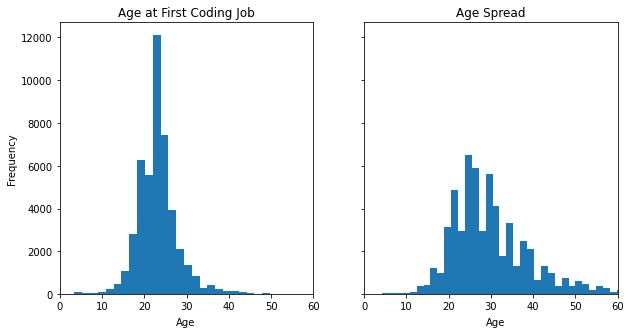

In [20]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (10, 5))
age_df[['Age1stJob']].plot(kind = 'hist', bins = 60, ax = axes[0], xlim = (0, 60), legend = False, title = 'Age at First Coding Job')
age_df[['Age']].plot(kind = 'hist', bins = 60, ax = axes[1], xlim = (0, 60), legend = False, title = 'Age Spread')
fig.text(0.3, 0.04, 'Age', ha='center')
fig.text(0.73, 0.04, 'Age', ha='center')
fig.savefig('AgeGraph.jpg')
#Plots estimate age of people starting work next to general current age spread